In [1]:
# To access our dataset file
from google.colab import drive
drive.mount('/content/drive/')
dataset_path = '/content/drive/Shareddrives/AAX/Resources/dataset_Seminar3/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Importing modules

import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import plotly.graph_objects as go

!pip install plotly

#**1) Part I: Data preparation & analysis**

We begin by loading the data from the dataset.

In [3]:
rssi_cols = ['AP1', 'AP2', 'AP3']
rssi_ds = pd.read_csv(dataset_path + 'rssi_data.csv', sep=",", header=None, names = rssi_cols)
rssi_lb = pd.read_csv(dataset_path + 'labels_data.csv', header=None, names=["Position"])
nlabels = len(rssi_lb['Position'].unique())

# rssi_ds['Position'] = rssi_lb


In [4]:
rssi_ds

,AP1,AP2,AP3
0,-21.949,-99.659,-42.257
1,-34.049,-95.964,-47.779
2,-18.861,-100.000,-34.175
3,-53.497,-77.368,-67.360
4,-54.986,-73.012,-69.780
...,...,...,...
1495,-18.605,-91.914,-40.047
1496,-52.422,-94.338,-56.171
1497,-46.410,-84.967,-69.519
1498,-29.124,-92.833,-50.673


#**2-D plots showing the RSSI perceived by each pair of APs (e.g., AP1 vs AP2).**

We have computed scatter plots to visualize the RSSI values for each pair of AP and recorded position. Moreover, each color represents a different ground truth position label (from 1 to 5).

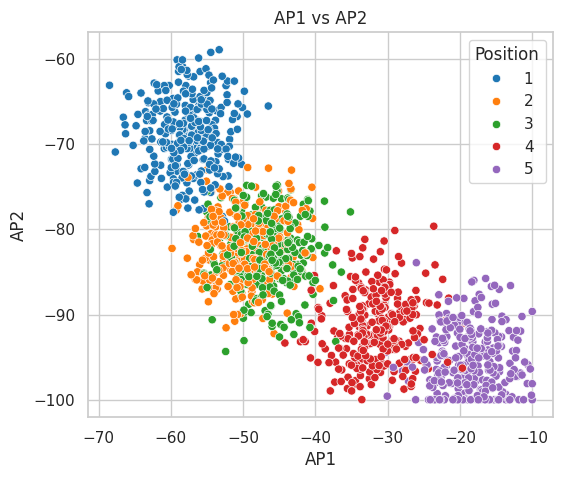

In [5]:
data = pd.concat([rssi_ds, rssi_lb], axis=1)

# Set style
sns.set(style="whitegrid")

# Plot AP1 vs AP2
plt.figure(figsize=(6, 5))
sns.scatterplot(data=data, x="AP1", y="AP2", hue="Position", palette="tab10")
plt.title("AP1 vs AP2")
plt.show()

In this scatter plot, we can observe that position 1 is the closest to AP2 and the furthest from AP1. Similarly, position 5 is the closest to AP2 and the furthest from AP1, suggesting that AP1 and AP2 are negatively proportional. Nevertheless, looking at the RSSI range of AP1, all five positions are closer to AP1 than AP2.

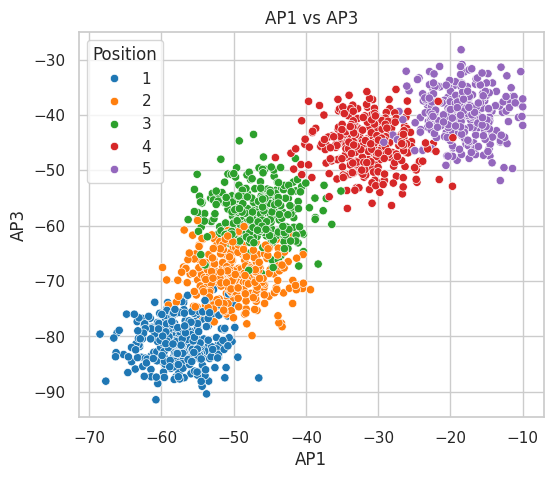

In [6]:
# Plot AP1 vs AP3
plt.figure(figsize=(6, 5))
sns.scatterplot(data=data, x="AP1", y="AP3", hue="Position", palette="tab10")
plt.title("AP1 vs AP3")
plt.show()

Here again, AP1 and AP3 are also positively proportional, and the RSSI range of AP1 has lower values, which implies that the positions are closer to AP1.

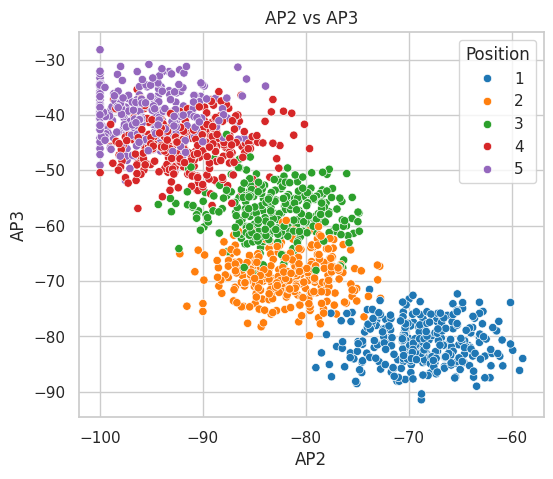

In [7]:
# Plot AP2 vs AP3
plt.figure(figsize=(6, 5))
sns.scatterplot(data=data, x="AP2", y="AP3", hue="Position", palette="tab10")
plt.title("AP2 vs AP3")
plt.show()

Finally, comparing the strength of AP2 and AP3, we can observe that this pair is also negatively proportional as AP1 and AP2. However, in this case, positions 5 and 4 overlap, implying that both positions are more or less at the same distance to the APs.

#**3-D plot showing the RSSI perceived by each of the APs.**

To easily visualize the distribution of the data points, we plot the data in an interactive 3D plot.

We can better appreciate now how the data points of each position are distributed.

In [8]:
# Define color mapping (same as before)
position_colors = {
    1: 'blue',
    2: 'orange',
    3: 'green',
    4: 'red',
    5: 'purple'
}

# Assign colors to each position
data['Color'] = data['Position'].map(position_colors)

# Create the interactive 3D plot
fig = go.Figure()

# Add scatter points for each position
for position, color in position_colors.items():
    position_data = data[data['Position'] == position]
    fig.add_trace(
        go.Scatter3d(
            x=position_data['AP1'],
            y=position_data['AP2'],
            z=position_data['AP3'],
            mode='markers',
            marker=dict(
                size=5,
                color=color,
                opacity=0.8
            ),
            name=f'Position {position}',
            hoverinfo='text',
            text=f"Position: {position}<br>AP1: {position_data['AP1']}<br>AP2: {position_data['AP2']}<br>AP3: {position_data['AP3']}"
        )
    )

# Update layout for better readability
fig.update_layout(
    title='Interactive 3D RSSI Plot (Drag to Rotate)',
    scene=dict(
        xaxis_title='RSSI from AP1 (dBm)',
        yaxis_title='RSSI from AP2 (dBm)',
        zaxis_title='RSSI from AP3 (dBm)',
        xaxis=dict(backgroundcolor='rgb(240, 240, 240)'),
        yaxis=dict(backgroundcolor='rgb(240, 240, 240)'),
        zaxis=dict(backgroundcolor='rgb(240, 240, 240)'),
    ),
    margin=dict(l=0, r=0, b=0, t=30),
    legend=dict(title='Position')
)

# Show the plot
fig.show()

Here we can see how there are clusters that are easy to identify and classify, although the clusters of positions 2 and 3 are really close together.

Next, we check the mean and the variance of each position per Access Point. If we look at where each cluster of data points from a position is, the values make sense. For example, the data points from Position 1 are centered around -60, -70, and -80 (AP1, AP2, AP3), which are more or less the values of the mean in the graph.

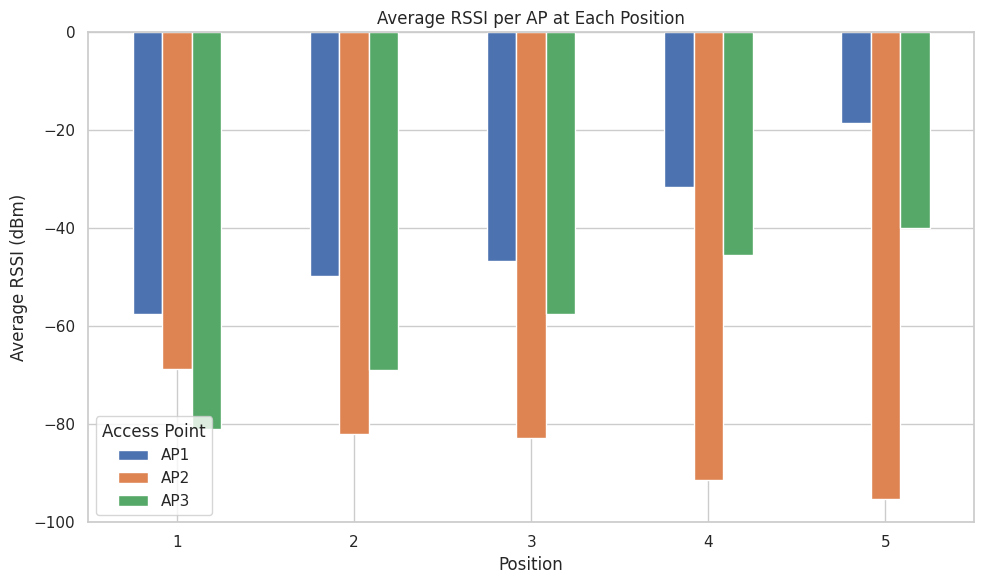

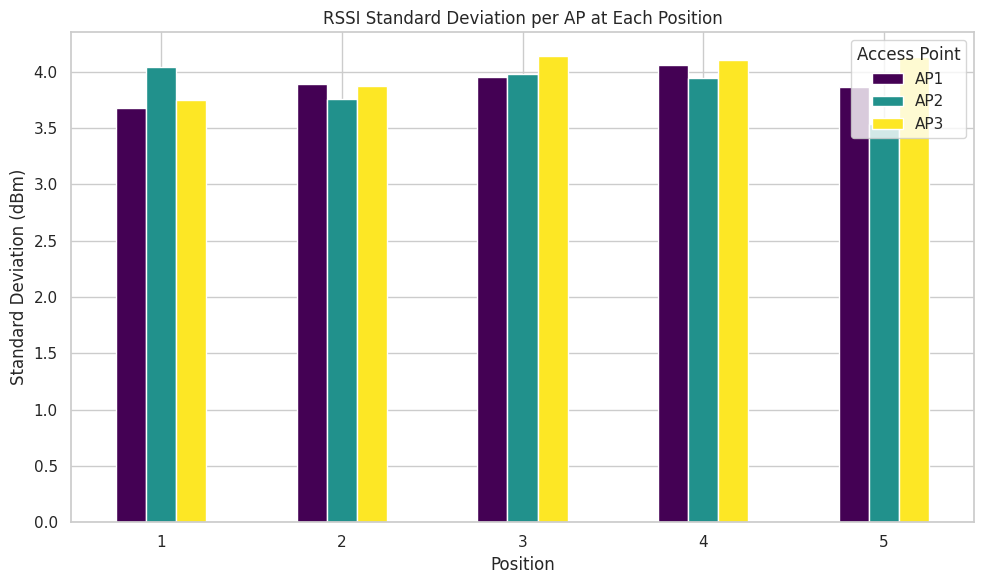

In [9]:

# Group by position and calculate mean & std
stats_mean = data.groupby('Position')[['AP1', 'AP2', 'AP3']].mean()
stats_std = data.groupby('Position')[['AP1', 'AP2', 'AP3']].std()

# Plot mean RSSI
stats_mean.plot(kind='bar', figsize=(10, 6))
plt.title("Average RSSI per AP at Each Position")
plt.ylabel("Average RSSI (dBm)")
plt.xlabel("Position")
plt.grid(True)
plt.xticks(rotation=0)
plt.legend(title="Access Point")
plt.tight_layout()
plt.show()

# Plot standard deviation of RSSI
stats_std.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("RSSI Standard Deviation per AP at Each Position")
plt.ylabel("Standard Deviation (dBm)")
plt.xlabel("Position")
plt.grid(True)
plt.xticks(rotation=0)
plt.legend(title="Access Point")
plt.tight_layout()
plt.show()


For better visualization, we add to the mean the difference from the variance in the following graph. The variance is quite similar in all the positions, so the difference in the amount of variability of each mean is quite difficult to notice.

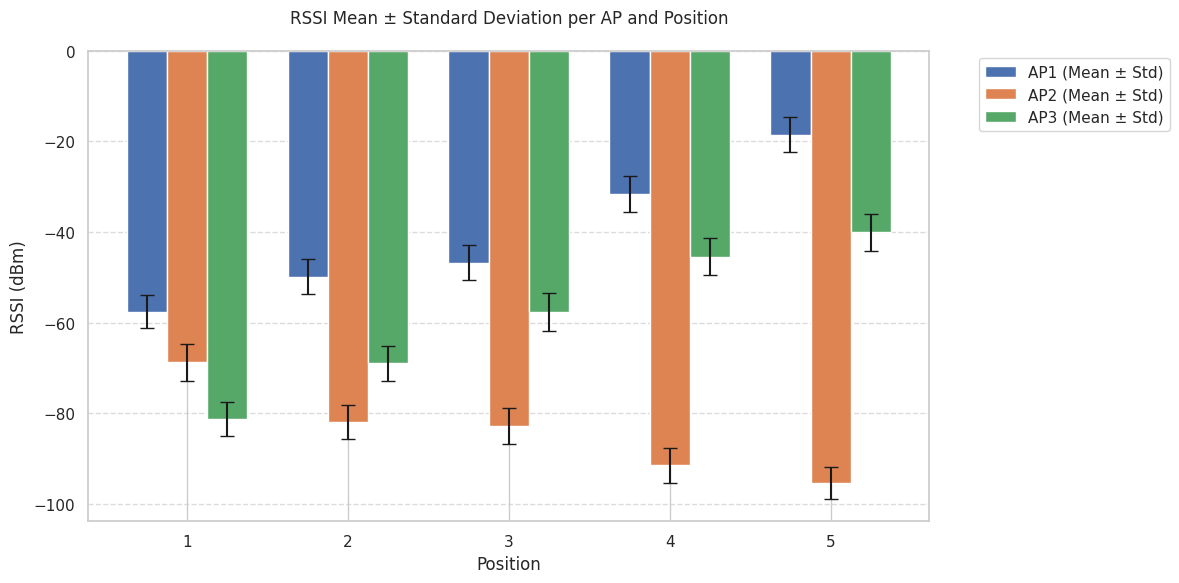

In [10]:
# Group by position and calculate mean & std
stats_mean = data.groupby('Position')[['AP1', 'AP2', 'AP3']].mean()
stats_std = data.groupby('Position')[['AP1', 'AP2', 'AP3']].std()

# Plot settings
plt.figure(figsize=(12, 6))
bar_width = 0.25
positions = np.arange(nlabels)

# Plot each AP's mean with error bars
for i, ap in enumerate(['AP1', 'AP2', 'AP3']):
    plt.bar(
        positions + i * bar_width,
        stats_mean[ap],
        width=bar_width,
        yerr=stats_std[ap],  # Error bars = ±1 std
        capsize=5,           # Cap size for error bars
        label=f'{ap} (Mean ± Std)'
    )

# Customize plot
plt.title("RSSI Mean ± Standard Deviation per AP and Position", pad=20)
plt.xlabel("Position")
plt.ylabel("RSSI (dBm)")
plt.xticks(positions + bar_width, stats_mean.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**2) Part II: k-means implementation**


Now we go ahead with the k-means implementation; in our case, we have 5 positions, so we do k=5.

First we prepare the data needed and create the initial centroids. Because our initial centroids are random, our first step is to set the seed.

In [11]:
# Seed for the randomization of the initial centroids
np.random.seed(12)    # Expected case
# np.random.seed(13)    # Special case (1)
# np.random.seed(500)   # Expected case
# np.random.seed(25)    # Expected case

We have tried some seeds at random and found that the algorithm converges in an expected way in most of them, and something different happens with certain seeds.

We have had cases where a random initial centroid was created very far from the data points in comparison with the others and ended up without any data points assigned. Because the initialization of centroids at random can be unreliable, we have implemented a check. After creating the random centroids, we do a single k-means iteration without updating centroids and check if there is a centroid without data points. A centroid not having a data point is not necessarily incorrect, as it could be assigned new data points as the other centroids shift position. Nevertheless, we decided that if the initial assignment skips at least one centroid, then the k-means will most likely end with 4 converging positions instead of 5, and it will be wrong.

In [12]:
# Load and prepare data
rssi_cols = ['AP1', 'AP2', 'AP3']
rssi_ds = pd.read_csv(dataset_path + 'rssi_data.csv', sep=",", header=None, names=rssi_cols)
rssi_lb = pd.read_csv(dataset_path + 'labels_data.csv', header=None, names=["Position"])
data = pd.concat([rssi_ds, rssi_lb], axis=1)

# Store ground truth and unique positions
true_labels = data['Position'].values
positions = data["Position"].unique()
positions.sort()

# Initialize centroids - sampling randomly from an equivalently distanced space
# derived from the range of values of each access point for each label.
initial_centroids = {}

def initialize_centroids():
  for i in range(nlabels):
    AP1_values = data['AP1'].values
    AP2_values = data['AP2'].values
    AP3_values = data['AP3'].values
    AP1_space = np.linspace(AP1_values.min(), AP1_values.max(), num = AP1_values.shape[0])
    AP2_space = np.linspace(AP2_values.min(), AP2_values.max(), num = AP2_values.shape[0])
    AP3_space = np.linspace(AP3_values.min(), AP3_values.max(), num = AP3_values.shape[0])
    centroid = []
    centroid.append(float(np.random.choice(AP1_space))); centroid.append(float(np.random.choice(AP2_space))); centroid.append(float(np.random.choice(AP3_space)))
    initial_centroids.update({i+1: centroid})

initialize_centroids()

### Does a single iteration of k-means without updating the clusters ###
distances = np.array([[np.linalg.norm(row - initial_centroids[pos]) for pos in positions]
                         for _, row in data[rssi_cols].iterrows()])
assignments = np.array([positions[np.argmin(d)] for d in distances]) # Stores the closest centroid for each point
########################################################################

# Check if after the first iteration all clusters have at least one point.
while(len(np.unique(assignments)) < nlabels):
  # If there are clusters without data points assigned, we consider this a bad initialization and try initializing again
  initial_centroids = {}
  initialize_centroids()
  distances = np.array([[np.linalg.norm(row - initial_centroids[pos]) for pos in positions]
                          for _, row in data[rssi_cols].iterrows()])
  assignments = [positions[np.argmin(d)] for d in distances]


# Copy the centroids to keep the initial values intact for reference.
centroids = initial_centroids.copy()

Next we perform the k-means until convergence or reaching max iterations.

In [13]:
max_iter = 100
prev_assignments = None
predictions = pd.DataFrame(columns=['AP1', 'AP2', 'AP3', 'Predicted'])

for i in range(max_iter):
    # Assign points to nearest centroid using euclidean distance
    distances = np.array([[np.linalg.norm(row - centroids[pos]) for pos in positions]
                         for _, row in data[rssi_cols].iterrows()])
    assignments = np.array([positions[np.argmin(d)] for d in distances]) # Stores the closest centroid for each point
    # assignments = [np.argmin(d) for d in distances] # Stores the closest centroid for each point

    # Check convergence
    if prev_assignments is not None and np.array_equal(assignments, prev_assignments):
        print(f"Converged after {i+1} iterations")
        break

    prev_assignments = assignments
    data['Predicted'] = assignments

    # Update centroids
    new_centroids = {}
    for pos in positions:
        cluster_points = data[data['Predicted'] == pos][rssi_cols]
        new_centroids[pos] = cluster_points.mean().values if not cluster_points.empty else centroids[pos]

    centroids = new_centroids
else:
    print("Reached max iterations")

Converged after 26 iterations


After finishing, we check the metrics to see the performance.

Before that, we have to be able to correlate the unsupervised results with the ground truth. We created a mapping to assign each cluster to their corresponding ground truth position by checking which position has the highest hits.


Classification Report:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       300
           2       0.50      0.95      0.66       300
           3       0.08      0.04      0.06       300
           4       0.92      0.51      0.66       300
           5       0.99      0.96      0.97       300

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.66      1500
weighted avg       0.69      0.69      0.66      1500



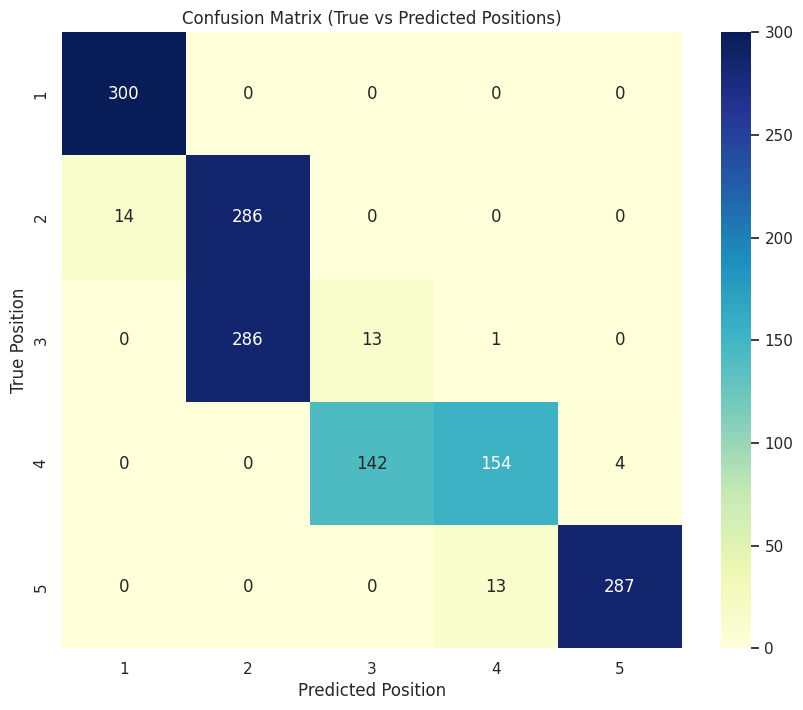

In [14]:
# Original data, ground truth
grouped_data = data.groupby(['Position'])
# Predictions
grouped_pred = data.groupby(['Predicted'])

Mapping = {}
taken_labels = []
for i in range(nlabels):
  ground_truth = grouped_data.get_group((i+1,))
  # truth_set = set(ground_truth[["AP1", "AP2", "AP3"]])
  hits = 0
  for j in range(nlabels):
    predictions = grouped_pred.get_group((j+1,))
    intersection = pd.merge(ground_truth, predictions, how='inner')

    # Check if current prediction has more hits and is not already assigned
    if len(intersection)>hits and (j+1) not in taken_labels:
      hits = len(intersection)
      true_label = j+1
  Mapping[true_label] = i+1
  taken_labels.append(true_label)

data = data.replace({'Predicted':Mapping})

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(true_labels, data['Predicted']))

# Confusion matrix with annotations
plt.figure(figsize=(10, 8))
cm = confusion_matrix(true_labels, data['Predicted'], labels=positions)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
           xticklabels=positions, yticklabels=positions)
plt.title('Confusion Matrix (True vs Predicted Positions)')
plt.xlabel('Predicted Position')
plt.ylabel('True Position')
plt.show()

**Seeds 12, 25, 500**

The final overall accuracy is a surprising 96% for all the seeds. When the initialization is "good", the random initial centroids all converge roughly in the same position, leading to a very high accuracy with little difference between the different seeds. We can also appreciate in the confusion matrix the “mixing” of positions 2 and 3; they both are by far the positions with the highest misses, and they are most numerous between themselves.

**Seed 13**

With this special case, the overall accuracy is 69% because almost all points from position 3 have been misclassified, as well as almost half from position 4. This will be further discussed later when more information is plotted.

Next, we create two 3D plots; the first shows the ground truth, and the second shows the predicted results with the position of the centroids in orange and the position of the initial centroids in grey.

In [17]:
#### GROUND TRUTH ####
# Define color mapping (same as before)
position_colors = {
    1: 'blue',
    2: 'orange',
    3: 'green',
    4: 'red',
    5: 'purple'
}

# Assign colors to each position
data['Color'] = data['Predicted'].map(position_colors)

# Create the interactive 3D plot
fig = go.Figure()

# Add scatter points for each position
for position, color in position_colors.items():
    position_data = data[data['Position'] == position]
    fig.add_trace(
        go.Scatter3d(
            x=position_data['AP1'],
            y=position_data['AP2'],
            z=position_data['AP3'],
            mode='markers',
            marker=dict(
                size=nlabels,
                color=color,
                opacity=0.8
            ),
            name=f'Position {position}',
            hoverinfo='text',
            text=f"Position: {position}<br>AP1: {position_data['AP1']}<br>AP2: {position_data['AP2']}<br>AP3: {position_data['AP3']}"
        )
    )

# Update layout for better readability
fig.update_layout(
    title='Interactive 3D RSSI Plot (Drag to Rotate)',
    scene=dict(
        xaxis_title='RSSI from AP1 (dBm)',
        yaxis_title='RSSI from AP2 (dBm)',
        zaxis_title='RSSI from AP3 (dBm)',
        xaxis=dict(backgroundcolor='rgb(240, 240, 240)'),
        yaxis=dict(backgroundcolor='rgb(240, 240, 240)'),
        zaxis=dict(backgroundcolor='rgb(240, 240, 240)'),
    ),
    margin=dict(l=0, r=0, b=0, t=30),
    legend=dict(title='Position')
)

# Show the plot
fig.show()

####################################################

#### PREDICTION ####

# Define your color mapping (same as before)
position_colors = {
    1: 'blue',
    2: 'orange',
    3: 'green',
    4: 'red',
    5: 'purple'
}

# Assign colors to each position
# data['Color'] = data['Position'].map(position_colors)

# Create the interactive 3D plot
fig = go.Figure()

# Add scatter points for each position
for position, color in position_colors.items():
    position_data = data[data['Predicted'] == position]
    fig.add_trace(
        go.Scatter3d(
            x=position_data['AP1'],
            y=position_data['AP2'],
            z=position_data['AP3'],
            mode='markers',
            marker=dict(
                size=5,
                color=color,
                opacity=0.8
            ),
            name=f'Position {position}',
            hoverinfo='text',
            text=f"Position: {position}<br>AP1: {position_data['AP1']}<br>AP2: {position_data['AP2']}<br>AP3: {position_data['AP3']}"
        )
    )

# Add centroids and initial centroids to the plot
centroid_df = pd.DataFrame(centroids)
initial_centroid_df = pd.DataFrame(initial_centroids)

fig.add_trace(
        go.Scatter3d(
            x=centroid_df.loc[0],
            y=centroid_df.loc[1],
            z=centroid_df.loc[2],
            mode='markers',
            marker=dict(
                size=10,
                color='orange',
                opacity=0.8
            ),
            name=f'Centroids',
            hoverinfo='text',
        )
    )

fig.add_trace(
        go.Scatter3d(
            x=initial_centroid_df.loc[0],
            y=initial_centroid_df.loc[1],
            z=initial_centroid_df.loc[2],
            mode='markers',
            marker=dict(
                size=10,
                color='gray',
                opacity=0.2
            ),
            name=f'Initial Centroids',
            hoverinfo='text',
        )
    )

# Update layout for better readability
fig.update_layout(
    title='Interactive 3D RSSI Plot (Drag to Rotate)',
    scene=dict(
        xaxis_title='RSSI from AP1 (dBm)',
        yaxis_title='RSSI from AP2 (dBm)',
        zaxis_title='RSSI from AP3 (dBm)',
        xaxis=dict(backgroundcolor='rgb(240, 240, 240)'),
        yaxis=dict(backgroundcolor='rgb(240, 240, 240)'),
        zaxis=dict(backgroundcolor='rgb(240, 240, 240)'),
    ),
    margin=dict(l=0, r=0, b=0, t=30),
    legend=dict(title='Position')
)

# Show the plot
fig.show()


**Expected case**

Comparing both 3D plots, there is almost no difference between them. The most notable difference is the points along the “border” of the clusters of position 2 and 3 (green and yellow), in which the distinction is more pronounced than in the ground truth, and it is the area which affects the most to the accuracy. This occurrence is heavily tied to what we have seen before in the confusion matrix.


**Special case (Seed 13)**

In this case, the initial centroids are created in a way that they converge with the data points from position 2 and 3 becoming a single cluster and the data points from position 4 sharing two clusters. This is why in the confusion matrix, the positions 2 and 3 both have an almost perfect hit rate with predicted position 2 and why the hit rate for true position 4 is split between predicted position 3 and 4.

There are most likely other seeds which cause similar effects. This is perhaps the most common “mistake” because in the ground truth, the clusters from positions 2 and 3 are really close together. The randomness of the initial centroids could translate into a centroid taking almost all of these data points due to their proximity. There is also the chance that it happens with other pair of positions, maybe the next likely after 2 and 3 would be 1 and 2.

Lastly, we perform additional metrics for different visualizations of the predicted distribution.

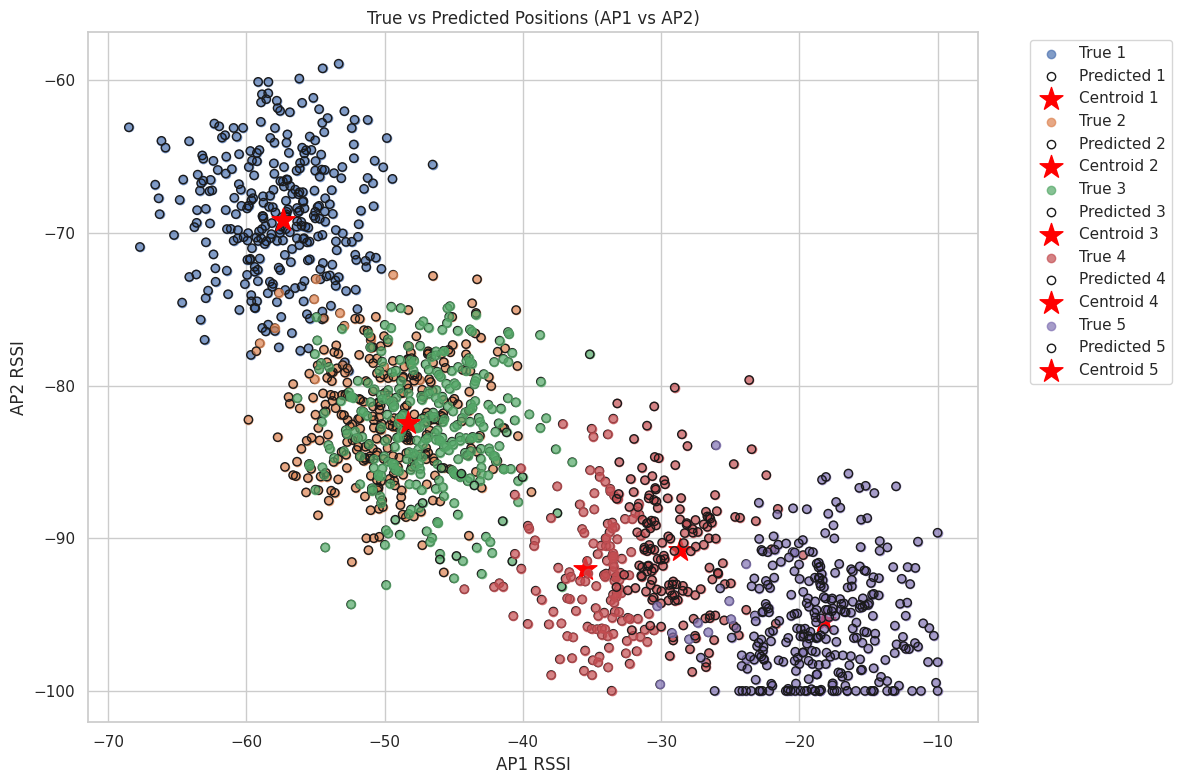

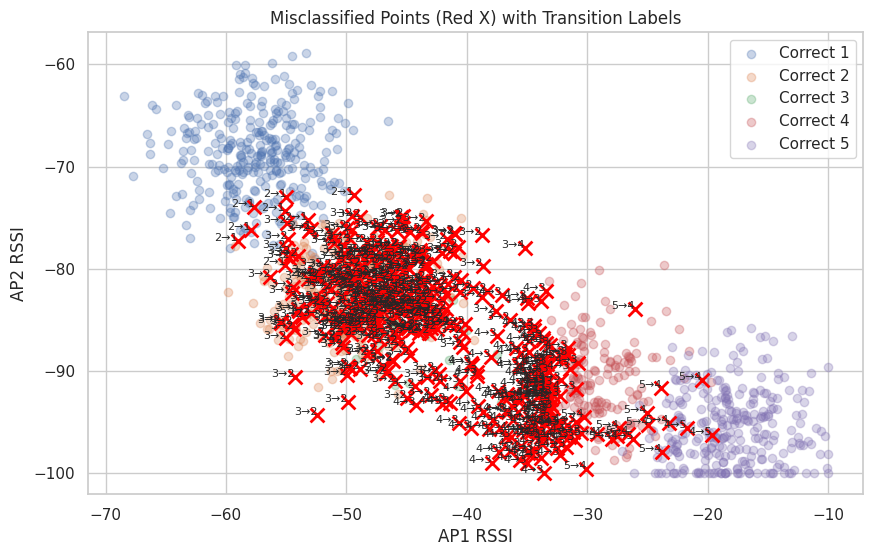

In [16]:
# Cluster visualization (first 2 dimensions for simplicity)
plt.figure(figsize=(12, 8))
for pos in positions:
    # True points
    true_points = data[data['Position'] == pos]
    plt.scatter(true_points['AP1'], true_points['AP2'],
                label=f'True {pos}', alpha=0.7)

    # Predicted points (hollow circles)
    pred_points = data[data['Predicted'] == pos]
    plt.scatter(pred_points['AP1'], pred_points['AP2'],
                facecolors='none', edgecolors='k',
                label=f'Predicted {pos}')

    # Centroids
    centroid = centroids[pos]
    plt.scatter(centroid[0], centroid[1], marker='*',
               s=300, c='red', label=f'Centroid {pos}')

plt.title('True vs Predicted Positions (AP1 vs AP2)')
plt.xlabel('AP1 RSSI')
plt.ylabel('AP2 RSSI')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Additional visualization: Error points
incorrect = data[data['Position'] != data['Predicted']]
if not incorrect.empty:
    plt.figure(figsize=(10, 6))
    for pos in positions:
        correct_points = data[(data['Position'] == pos) & (data['Predicted'] == pos)]
        plt.scatter(correct_points['AP1'], correct_points['AP2'],
                   label=f'Correct {pos}', alpha=0.3)

    for _, row in incorrect.iterrows():
        plt.scatter(row['AP1'], row['AP2'],
                   marker='x', s=100, c='red',
                   linewidths=2)
        plt.text(row['AP1'], row['AP2'],
                f"{row['Position']}→{row['Predicted']}",
                fontsize=8, ha='right')

    plt.title('Misclassified Points (Red X) with Transition Labels')
    plt.xlabel('AP1 RSSI')
    plt.ylabel('AP2 RSSI')
    plt.legend()
    plt.show()

The first graph may be hard to read, the graph shows the True vs Predicted points. If a point has a black border, it means it was predicted successfully. The graph below is the highlight of the misclassified points and their true position.

These graphs show what we have already seen and discused previously.